In [278]:
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
import io

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns',None) #display all columns
pd.set_option('display.max_rows',None) #display all rows

# Required Input files
# When running for the very first time, `ipl2025_results.csv`` file is required with all the team managers and an initial row of 0s.
# IPL2025MockAuctionSummary.csv file is required with each of the managers, their teams and their players listed.

# Dependencies to install
#  pip3 install beautifulsoup4
#  pip3 install lxml ??? (Double check if required)
#  pip3 install html5lib ??? (Double check if required)
#  pip3 install pywhatkit
#  pip3 install matplotlib
#  pip3 install selenium
#  pip3 install tabulate

In [ ]:
# Backup the input and output files for each day for posterity

# Change for each day
day_num = 3
day = 'day_' + str(day_num)
prev_day = 'day_' + str(day_num - 1)

# Change for each group
group = 'group_1'

results_file = f'./{group}/ipl2025_results_{day}.csv'
prev_results_file = f'./{group}/ipl2025_results_{prev_day}.csv'

ipl_mock_auction_summary = f'./{group}/IPL2025MockAuctionSummary.csv'

In [280]:
mvp_df = pd.read_csv(f'./data/mvp_{day}.csv')
mvp_df

,POS,Player,Pts,Mat,Wkts,Dots,4s,6s,Catches,Run outs,Stumpings,Team
0,1,ishan kishan,51.0,1,0,0,11,6,1,0.0,0,SRH
1,2,nicholas pooran,44.5,1,0,0,6,7,2,0.0,0,LSG
2,3,mitchell marsh,36.0,1,0,0,6,6,0,0.0,0,LSG
3,4,dhruv jurel,33.5,1,0,0,5,6,0,0.0,0,RR
4,5,travis head,33.0,1,0,0,9,3,0,0.0,0,SRH
5,6,sanju samson,31.5,1,0,0,7,4,0,0.0,0,RR
6,7,sunil narine,31.5,1,1,5,5,3,0,0.0,0,KKR
7,8,ashutosh sharma,30.0,1,0,0,5,5,0,0.0,0,DC
8,9,phil salt,29.5,1,0,0,9,2,0,0.0,0,RCB
9,10,ajinkya rahane,29.0,1,0,0,6,4,0,0.0,0,KKR


In [281]:
fantasy_teams_auction_df = pd.read_csv(ipl_mock_auction_summary)
fantasy_teams_auction_df

,Kumar & Akash,Vasan,Manav,Vasanth,Raghav,Arvindh,Niranjini,Mira & Arjun,Sriram V,Sriram KM
0,Gujarat Titans,Delhi Capitals,Lucknow Super Giants,Royal Challengers Bengaluru,Punjab Kings,Chennai Super Kings,Rajasthan Royals,Mumbai Indians,Kolkata Knight Riders,Sunrisers Hyderabad
1,Shubman Gill,KL Rahul,Mitchell Marsh,Virat Kohli,Ryan Rickleton,Matheesha Pathirana,Yashasvi Jaiswal,N Tilak Varma,Andre Russell,Travis Head
2,Jos Buttler,Mitchell Starc,Priyansh Arya,Phil Salt,Jitesh Sharma,Ruturaj Gaikwad,Sanju Samson,Suryakumar Yadav,Venkatesh Iyer,Abhishek Sharma
3,Rashid Khan,Axar Patel,Glenn Philipps,Rajat Patidar,Rinku Singh,Ravindra Jadeja,Sunil Narine,Trent Boult,Varun Chakaravarthy,Heinrich Klaasen
4,Deepak Chahar,Glenn Maxwell,Vaibhav Arora,Akash Madhwal,Avesh Khan,Rasikh Dar,Mukesh Kumar,Kamlesh Nagarkoti,David Miller,Jaydev Unadkat
5,Ravichandran Ashwin,Kagiso Rabada,Dhruv Jurel,Krunal Pandya,Harpreet Brar,Jamie Overton,Marcus Stoinis,Noor Ahmad,Hardik Pandya,Reece Topley
6,Deepak Hooda,Khaleel Ahmed,Arshdeep Singh,T Natarajan,Tim David,Corbin Bosch,Jofra Archer,Shahbaz Ahamad,Shamar Joseph,Josh Inglis
7,Vijay Shankar,Karn Sharma,Rahul Chahar,Rishabh Pant,MS Dhoni,Rahul Tewatia,Abhinav Manohar,Anuj Rawat,Angkrish Raghuvanshi,Nitish Kumar Reddy
8,Riyan Parag,Rahmanullah Gurbaz,Rohit Sharma,Bhuvneshwar Kumar,Nathan Ellis,Sandeep Sharma,Mohammed Shami,Anshul Kamboj,Mujeeb Ur Rahman,Sai Kishore
9,Sameer Rizvi,Prasidh Krishna,Devdutt Padikkal,Marco Jansen,Jasprit Bumrah,Anrich Nortje,Ravi Bishnoi,Jake Fraser-McGurk,Ishan Kishan,Tristan Stubbs


In [282]:
fantasy_mgrs = fantasy_teams_auction_df.columns
fantasy_mgrs.to_list()

['Kumar & Akash',
 'Vasan',
 'Manav',
 'Vasanth',
 'Raghav',
 'Arvindh',
 'Niranjini',
 'Mira & Arjun',
 'Sriram V',
 'Sriram KM']

In [283]:
#Make new dataframe for manager_teams 
fantasy_mgr_teams = fantasy_teams_auction_df.iloc[:1]
fantasy_mgr_teams

,Kumar & Akash,Vasan,Manav,Vasanth,Raghav,Arvindh,Niranjini,Mira & Arjun,Sriram V,Sriram KM
0,Gujarat Titans,Delhi Capitals,Lucknow Super Giants,Royal Challengers Bengaluru,Punjab Kings,Chennai Super Kings,Rajasthan Royals,Mumbai Indians,Kolkata Knight Riders,Sunrisers Hyderabad


In [284]:
import os
#Create new dataframe for manager_players
fantasy_teams_df = fantasy_teams_auction_df.iloc[1:]
fantasy_teams_df = fantasy_teams_df.apply(lambda x: x.astype(str).str.lower())

fantasy_teams_df_per_mgr = {}
for mgr in fantasy_teams_df.columns:
    mgr_file = f'./{group}/{mgr}.csv'
    if not os.path.exists(mgr_file):
        df = pd.DataFrame(fantasy_teams_df[mgr])
        df.to_csv(mgr_file, index=False)
    else:
        df = pd.read_csv(mgr_file)
    fantasy_teams_df_per_mgr[mgr] = df
fantasy_teams_df


,Kumar & Akash,Vasan,Manav,Vasanth,Raghav,Arvindh,Niranjini,Mira & Arjun,Sriram V,Sriram KM
1,shubman gill,kl rahul,mitchell marsh,virat kohli,ryan rickleton,matheesha pathirana,yashasvi jaiswal,n tilak varma,andre russell,travis head
2,jos buttler,mitchell starc,priyansh arya,phil salt,jitesh sharma,ruturaj gaikwad,sanju samson,suryakumar yadav,venkatesh iyer,abhishek sharma
3,rashid khan,axar patel,glenn philipps,rajat patidar,rinku singh,ravindra jadeja,sunil narine,trent boult,varun chakaravarthy,heinrich klaasen
4,deepak chahar,glenn maxwell,vaibhav arora,akash madhwal,avesh khan,rasikh dar,mukesh kumar,kamlesh nagarkoti,david miller,jaydev unadkat
5,ravichandran ashwin,kagiso rabada,dhruv jurel,krunal pandya,harpreet brar,jamie overton,marcus stoinis,noor ahmad,hardik pandya,reece topley
6,deepak hooda,khaleel ahmed,arshdeep singh,t natarajan,tim david,corbin bosch,jofra archer,shahbaz ahamad,shamar joseph,josh inglis
7,vijay shankar,karn sharma,rahul chahar,rishabh pant,ms dhoni,rahul tewatia,abhinav manohar,anuj rawat,angkrish raghuvanshi,nitish kumar reddy
8,riyan parag,rahmanullah gurbaz,rohit sharma,bhuvneshwar kumar,nathan ellis,sandeep sharma,mohammed shami,anshul kamboj,mujeeb ur rahman,sai kishore
9,sameer rizvi,prasidh krishna,devdutt padikkal,marco jansen,jasprit bumrah,anrich nortje,ravi bishnoi,jake fraser-mcgurk,ishan kishan,tristan stubbs
10,tushar deshpande,ramandeep singh,akash deep,wanindu hasaranga,shashank singh,maheesh theekshana,nitish rana,sam curran,shreyas iyer,suyash sharma


In [285]:
# Compute total score for each fantasy team based on MVP points of each player
scores = { fantasy_mgr:0 for fantasy_mgr in fantasy_mgrs.to_list() }
for mgr in fantasy_mgrs:
    print(mgr)
    mgr_df = fantasy_teams_df_per_mgr[mgr]
    mgr_day_pts = {}
    mgr_file = f'./{group}/{mgr}.csv'
    all_players_have_min_pts = True
    for i in range(len(fantasy_teams_df[mgr])):
        player_name = str(fantasy_teams_df[mgr].iloc[i]).lower()
        if player_name in mvp_df['Player'].to_list():
            player_score = float(mvp_df.loc[mvp_df['Player'] == fantasy_teams_df[mgr].iloc[i],'Pts'].iloc[0])
            scores[mgr] += player_score
            mgr_day_pts[player_name] = player_score
            print(f'\t{player_name} points found. Adding his score {player_score} to total. New score {scores[mgr]}')
        else:
            mgr_day_pts[player_name] = 0.0
            print(f'\t{player_name} not found in mvp_table... Double check the spelling of player name.')
            all_players_have_min_pts = False
    mgr_df[f'{day}'] = mgr_df[mgr].map(mgr_day_pts)
    mgr_df.to_csv(mgr_file, index=False)
    print(f'*{day.upper()}*\n```\n{mgr_df.to_markdown(index=False)}\n```')
    if all_players_have_min_pts:
        print(f'All players have min fantasy points.')

Kumar & Akash
	shubman gill not found in mvp_table... Double check the spelling of player name.
	jos buttler not found in mvp_table... Double check the spelling of player name.
	rashid khan not found in mvp_table... Double check the spelling of player name.
	deepak chahar points found. Adding his score 22.0 to total. New score 22.0
	ravichandran ashwin points found. Adding his score 9.5 to total. New score 31.5
	deepak hooda not found in mvp_table... Double check the spelling of player name.
	vijay shankar not found in mvp_table... Double check the spelling of player name.
	riyan parag points found. Adding his score 7.5 to total. New score 39.0
	sameer rizvi points found. Adding his score 2.5 to total. New score 41.5
	tushar deshpande points found. Adding his score 18.5 to total. New score 60.0
	sai sudharsan not found in mvp_table... Double check the spelling of player name.
	josh hazlewood points found. Adding his score 23.0 to total. New score 83.0
	rahul tripathi not found in mvp_t

In [286]:
scores

{'Kumar & Akash': 83.0,
 'Vasan': 96.5,
 'Manav': 134.5,
 'Vasanth': 134.0,
 'Raghav': 98.5,
 'Arvindh': 100.0,
 'Niranjini': 126.5,
 'Mira & Arjun': 64.5,
 'Sriram V': 87.0,
 'Sriram KM': 114.0}

In [287]:
ipl_team_pts_tbl = pd.read_csv(f'./data/standings_{day}.csv')
ipl_team_pts_tbl

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against
0,Sunrisers Hyderabad,1,1,0,0,0,2,2.200,W,"vs LSG, DC, KKR",286/20.0,242/20.0
1,Royal Challengers Bengaluru,1,1,0,0,0,2,2.137,W,"vs CSK, GT, MI",177/16.2,174/20.0
2,Chennai Super Kings,1,1,0,0,0,2,0.493,W,"vs RCB, RR, DC",158/19.1,155/20.0
3,Delhi Capitals,1,1,0,0,0,2,0.371,W,"vs SRH, CSK, RCB",211/19.3,209/20.0
4,Lucknow Super Giants,1,0,1,0,0,0,-0.371,L,"vs SRH, PBKS, MI",209/20.0,211/19.3
5,Mumbai Indians,1,0,1,0,0,0,-0.493,L,"vs GT, KKR, LSG",155/20.0,158/19.1
6,Kolkata Knight Riders,1,0,1,0,0,0,-2.137,L,"vs RR, MI, SRH",174/20.0,177/16.2
7,Rajasthan Royals,1,0,1,0,0,0,-2.200,L,"vs KKR, CSK, PBKS",242/20.0,286/20.0
8,Gujarat Titans,-,-,-,-,-,-,-,NaN,"vs PBKS, MI, RCB",-,-
9,Punjab Kings,-,-,-,-,-,-,-,NaN,"vs GT, LSG, RR",-,-


In [288]:
for mgr in fantasy_teams_df.columns:
    no_of_wins = 0
    if fantasy_mgr_teams[mgr].item() in ipl_team_pts_tbl.Teams.to_list():
        no_of_wins = ipl_team_pts_tbl.loc[ipl_team_pts_tbl['Teams'] == fantasy_mgr_teams[mgr].item(),'W'].item()
        if no_of_wins == '-':
            no_of_wins=0
        scores[mgr] += (float(no_of_wins)*50)
        print(f'{str(mgr)}\t{str(fantasy_mgr_teams[mgr].values)}\t{str(no_of_wins)}')

Kumar & Akash	['Gujarat Titans']	0
Vasan	['Delhi Capitals']	1
Manav	['Lucknow Super Giants']	0
Vasanth	['Royal Challengers Bengaluru']	1
Raghav	['Punjab Kings']	0
Arvindh	['Chennai Super Kings']	1
Niranjini	['Rajasthan Royals']	0
Mira & Arjun	['Mumbai Indians']	0
Sriram V	['Kolkata Knight Riders']	0
Sriram KM	['Sunrisers Hyderabad']	1


In [289]:
prev_scores = pd.read_csv(prev_results_file)
prev_scores_dicts = prev_scores.to_dict(orient='records')
prev_scores_dicts

[{'Kumar & Akash': 0.0,
  'Vasan': 0.0,
  'Manav': 0.0,
  'Vasanth': 0.0,
  'Raghav': 0.0,
  'Arvindh': 0.0,
  'Niranjini': 0.0,
  'Mira & Arjun': 0.0,
  'Sriram V': 0.0,
  'Sriram KM': 0.0},
 {'Kumar & Akash': 0.0,
  'Vasan': 0.0,
  'Manav': 0.0,
  'Vasanth': 0.0,
  'Raghav': 0.0,
  'Arvindh': 0.0,
  'Niranjini': 0.0,
  'Mira & Arjun': 0.0,
  'Sriram V': 0.0,
  'Sriram KM': 0.0},
 {'Kumar & Akash': 80.5,
  'Vasan': 55.0,
  'Manav': 54.0,
  'Vasanth': 153.0,
  'Raghav': 81.5,
  'Arvindh': 148.5,
  'Niranjini': 104.0,
  'Mira & Arjun': 55.0,
  'Sriram V': 75.0,
  'Sriram KM': 145.0}]

In [290]:
current_scores_dict = prev_scores_dicts + [scores]

In [291]:
graph_scores = pd.DataFrame(current_scores_dict)
graph_scores

,Kumar & Akash,Vasan,Manav,Vasanth,Raghav,Arvindh,Niranjini,Mira & Arjun,Sriram V,Sriram KM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.5,55.0,54.0,153.0,81.5,148.5,104.0,55.0,75.0,145.0
3,83.0,146.5,134.5,184.0,98.5,150.0,126.5,64.5,87.0,164.0


In [292]:
graph_scores.to_csv(results_file, index=False)

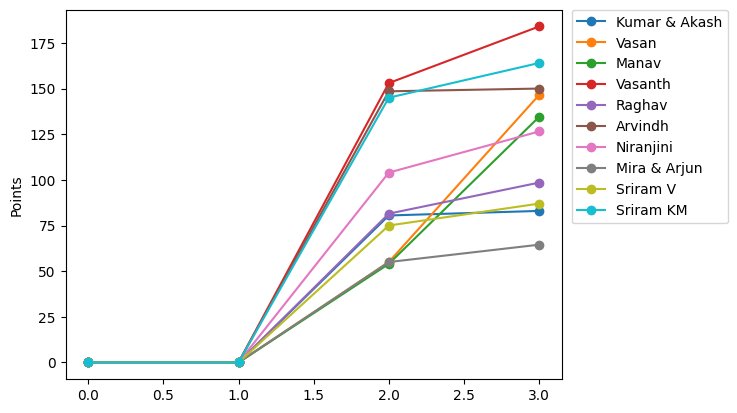

In [293]:
import matplotlib.pyplot as plt
ax = graph_scores.plot.line(marker='o')
#ax.set_xlabel("Days")
ax.set_ylabel("Points")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [294]:
scores_sorted = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
score_msg = str(scores_sorted)

scores_msg_df = pd.DataFrame(
    scores_sorted.items(),
    columns=['Manager', 'Points']
)
print(f'*{day.upper()}*\n```\n{scores_msg_df.to_markdown(index=False)}\n```')

*DAY_3*
```
| Manager       |   Points |
|:--------------|---------:|
| Vasanth       |    184   |
| Sriram KM     |    164   |
| Arvindh       |    150   |
| Vasan         |    146.5 |
| Manav         |    134.5 |
| Niranjini     |    126.5 |
| Raghav        |     98.5 |
| Sriram V      |     87   |
| Kumar & Akash |     83   |
| Mira & Arjun  |     64.5 |
```
